### Імпортування бібліотек

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.simplefilter('ignore')

### Зчитування даних та первинний аналіз

In [24]:
ds = pd.read_csv('../data/variant_1.csv')
print('Columns count >> ', len(ds.columns), '\n')
print('Columns >> ', list(ds.columns))

Columns count >>  34 

Columns >>  ['Unnamed: 0', 'ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status']


In [25]:
print('Samples count >> ', ds.shape[0])
print (ds.head(5))

Samples count >>  148670
   Unnamed: 0     ID  year loan_limit             Gender approv_in_adv  \
0           0  24890  2019         cf  Sex Not Available         nopre   
1           1  24891  2019         cf               Male         nopre   
2           2  24892  2019         cf               Male           pre   
3           3  24893  2019         cf               Male         nopre   
4           4  24894  2019         cf              Joint           pre   

  loan_type loan_purpose Credit_Worthiness open_credit  ...   income  \
0     type1           p1                l1        nopc  ...   1740.0   
1     type2           p1                l1        nopc  ...   4980.0   
2     type1           p1                l1        nopc  ...   9480.0   
3     type1           p4                l1        nopc  ...  11880.0   
4     type1           p1                l1        nopc  ...  10440.0   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758    

### Перевірка відсутності даних

In [26]:
print("Is there any missing data >> ", ds.isnull().values.any())

Is there any missing data >>  True


In [27]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print('Missing data in ', col)

Missing data in  loan_limit
Missing data in  approv_in_adv
Missing data in  loan_purpose
Missing data in  rate_of_interest
Missing data in  Interest_rate_spread
Missing data in  Upfront_charges
Missing data in  term
Missing data in  Neg_ammortization
Missing data in  property_value
Missing data in  income
Missing data in  age
Missing data in  submission_of_application
Missing data in  LTV


In [28]:
missing = list()
for x in ds.columns: 
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

loan_limit

 3344
approv_in_adv 908
loan_purpose 134
rate_of_interest 36439
Interest_rate_spread 36639
Upfront_charges 39642
term 41
Neg_ammortization 121
property_value 15098
income 9150
age 200
submission_of_application 200
LTV 15098


In [29]:
ds.nunique()

Unnamed: 0                   148670
ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type    

### Опис та глибокий аналіз датасету

In [30]:
ds.describe()

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,74334.500000,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,0.000000,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,37167.250000,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,74334.500000,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,111501.750000,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,148669.000000,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


In [31]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 148670 non-null  int64  
 1   ID                         148670 non-null  int64  
 2   year                       148670 non-null  int64  
 3   loan_limit                 145326 non-null  object 
 4   Gender                     148670 non-null  object 
 5   approv_in_adv              147762 non-null  object 
 6   loan_type                  148670 non-null  object 
 7   loan_purpose               148536 non-null  object 
 8   Credit_Worthiness          148670 non-null  object 
 9   open_credit                148670 non-null  object 
 10  business_or_commercial     148670 non-null  object 
 11  loan_amount                148670 non-null  int64  
 12  rate_of_interest           112231 non-null  float64
 13  Interest_rate_spread       11

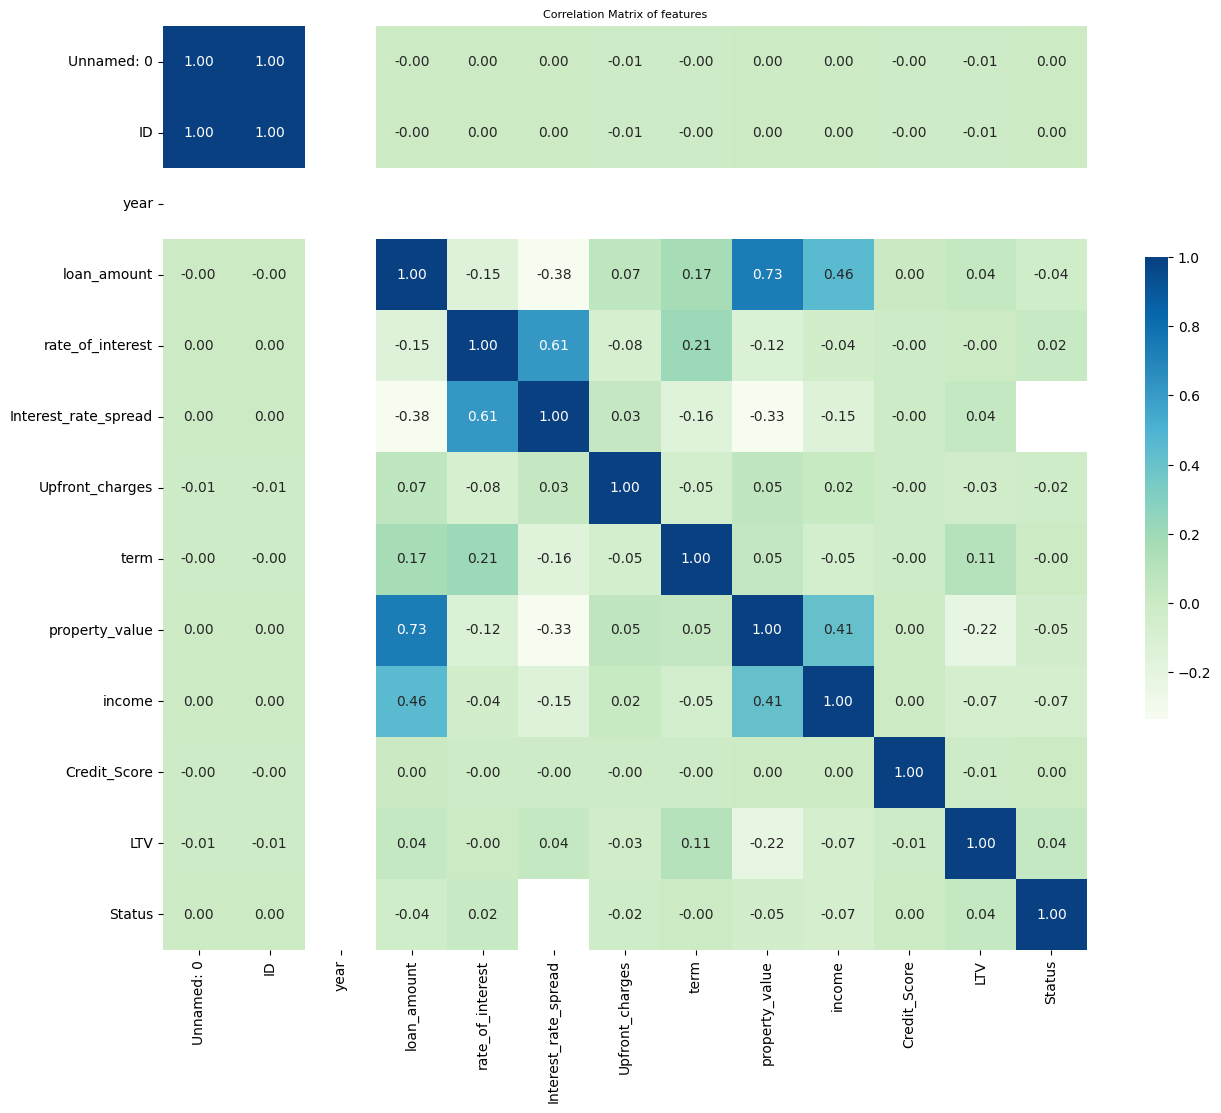

In [32]:
plt.rcParams["figure.figsize"] = (15,12)
correlation_matrix = ds.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

In [34]:
print(ds.select_dtypes(include=['float64', 'int64']).columns)

Index(['Unnamed: 0', 'ID', 'year', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value',
       'income', 'Credit_Score', 'LTV', 'Status'],
      dtype='object')


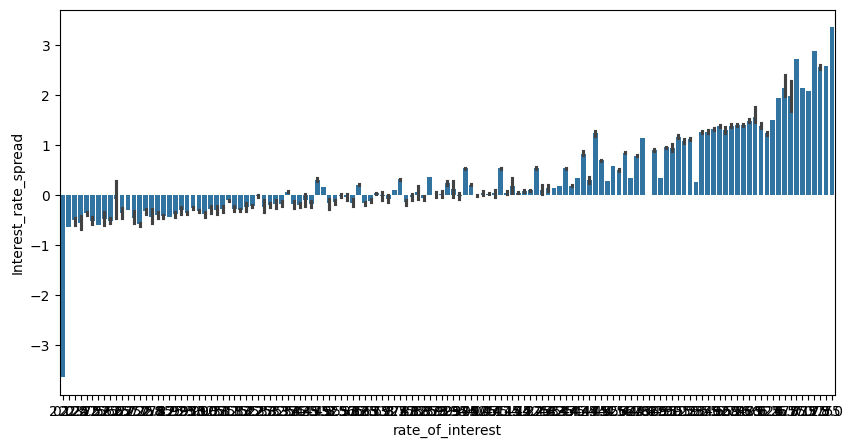

In [35]:
plt.rcParams['figure.figsize'] = (10,5)
graph = ds[['rate_of_interest', 'Interest_rate_spread']]
ax = sns.barplot(x='rate_of_interest', y='Interest_rate_spread', data=graph)

<Axes: >

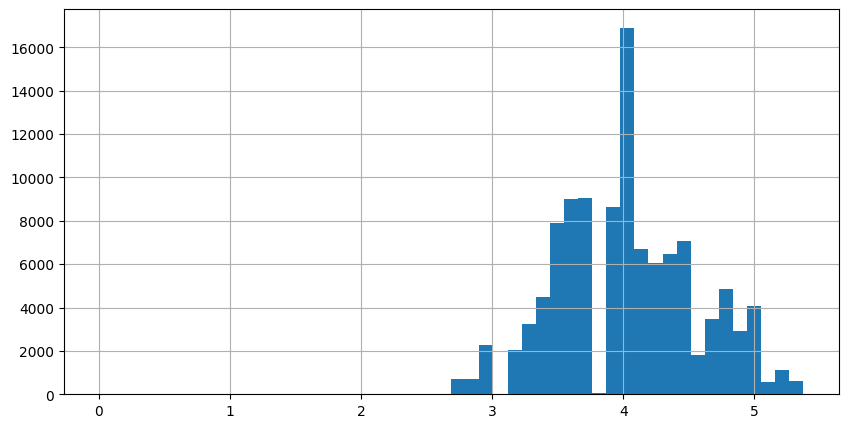

In [44]:
ds[ds['rate_of_interest'] < 5.4]['rate_of_interest'].hist(bins=50)